# IMPORTS

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns
sns.set()
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

from IPython.core.display import HTML

In [233]:
acc_5_7 = pd.read_csv('accidents_2005_to_2007.csv')
acc_9_11 = pd.read_csv('accidents_2009_to_2011.csv')
acc_12_14 = pd.read_csv('accidents_2012_to_2014.csv')

/Users/djurk/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [234]:
#combine all the years data
allaccidents = pd.concat([acc_5_7, acc_9_11, acc_12_14], axis=0)

In [235]:
#only need Long/Lat
allaccidents = allaccidents.drop(['Location_Easting_OSGR','Location_Northing_OSGR'], axis = 1)

In [236]:
allaccidents['Month'] = allaccidents['Date'].str[3:5]

In [237]:

allaccidents['Hour'] = allaccidents['Time'].str[0:2]

In [238]:
len(allaccidents)

1504150

In [9]:
allaccidents.to_csv('allaccidents.csv', index=False)

## load dataset instead

In [329]:
allaccidents = pd.read_csv('allaccidents.csv')

/Users/djurk/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [330]:
allaccidents['count'] = 1

In [260]:
allaccidents.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Month', 'Hour', 'count'],
      dtype='object')

In [295]:
allaccidents.head()

Accident_Index  Longitude   Latitude  Police_Force  Accident_Severity  \
0       2.01e+12  -2.775021  54.649766             3                  3   
1       2.01e+12  -2.897319  54.910354             3                  3   
2       2.01e+12  -2.650582  54.300442             3                  2   
3       2.01e+12  -2.711737  54.309084             3                  3   
4       2.01e+12  -2.856827  54.641216             3                  3   

   Number_of_Vehicles  Number_of_Casualties        Date  Day_of_Week   Time  \
0                   1                     2  02/01/2012            2  15:33   
1                   1                     1  03/01/2012            3  07:00   
2                   1                     3  02/01/2012            2  10:26   
3                   1                     1  04/01/2012            4  10:10   
4                   3                     1  06/01/2012            6  18:30   

   Local_Authority_(District) Local_Authority_(Highway)  1st_Road_Class  \
0                          64                 E10000006               3   
1                          62                 E10000006               1   
2                          65                 E10000006               1   
3                          65                 E10000006               6   
4                          64                 E10000006               3   

   1st_Road_Number           Road_Type  Speed_limit  Junction_Detail  \
0               66    Dual carriageway           70              NaN   
1                6    Dual carriageway           70              NaN   
2                6    Dual carriageway           70              NaN   
3                0  Single carriageway           60              NaN   
4               66    Dual carriageway           70              NaN   

  Junction_Control  2nd_Road_Class  2nd_Road_Number  \
0              NaN              -1                0   
1              NaN              -1                0   
2              NaN              -1                0   
3              NaN              -1                0   
4              NaN              -1                0   

  Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities  \
0             None within 50 metres   No physical crossing within 50 meters   
1             None within 50 metres   No physical crossing within 50 meters   
2             None within 50 metres   No physical crossing within 50 meters   
3             None within 50 metres   No physical crossing within 50 meters   
4             None within 50 metres   No physical crossing within 50 meters   

                 Light_Conditions          Weather_Conditions  \
0   Darkeness: No street lighting     Fine without high winds   
1   Darkeness: No street lighting        Fine with high winds   
2  Daylight: Street light present     Snowing with high winds   
3  Daylight: Street light present  Raining without high winds   
4   Darkeness: No street lighting     Raining with high winds   

  Road_Surface_Conditions Special_Conditions_at_Site  \
0                Wet/Damp                       None   
1                     Dry                       None   
2                    Snow                       None   
3                Wet/Damp                       None   
4                Wet/Damp                       None   

                  Carriageway_Hazards  Urban_or_Rural_Area  \
0                                None                    2   
1                                None                    2   
2         Other object in carriageway                    2   
3                                None                    2   
4  Involvement with previous accident                    2   

  Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  Year  \
0                                         Yes                 E01019311  2012   
1                                         Yes                 E01019240  2012   
2                                         

### accidents by district

In [6]:
lad = allaccidents.groupby(['Local_Authority_(Highway)','Year']).count()

In [7]:
lad.head()

Accident_Index  Longitude  Latitude  \
Local_Authority_(Highway) Year                                        
E06000001                 2005             219        219       219   
                          2006             214        214       214   
                          2007             172        172       172   
                          2009             150        150       150   
                          2010             142        142       142   

                                Police_Force  Accident_Severity  \
Local_Authority_(Highway) Year                                    
E06000001                 2005           219                219   
                          2006           214                214   
                          2007           172                172   
                          2009           150                150   
                          2010           142                142   

                                Number_of_Vehicles  Number_of_Casualties  \
Local_Authority_(Highway) Year                                             
E06000001                 2005                 219                   219   
                          2006                 214                   214   
                          2007                 172                   172   
                          2009                 150                   150   
                          2010                 142                   142   

                                Date  Day_of_Week  Time  ...    \
Local_Authority_(Highway) Year                           ...     
E06000001                 2005   219          219   219  ...     
                          2006   214          214   214  ...     
                          2007   172          172   172  ...     
                          2009   150          150   150  ...     
                          2010   142          142   142  ...     

                                Weather_Conditions  Road_Surface_Conditions  \
Local_Authority_(Highway) Year                                                
E06000001                 2005                 219                      219   
                          2006                 214                      214   
                          2007                 172                      172   
                          2009                 150                      150   
                          2010                 142                      142   

                                Special_Conditions_at_Site  \
Local_Authority_(Highway) Year                               
E06000001                 2005                         219   
                          2006                         214   
                          2007                         172   
                          2009                         150   
                          2010                         142   

                                Carriageway_Hazards  Urban_or_Rural_Area  \
Local_Authority_(Highway) Year                                             
E06000001                 2005                  219                  219   
                          2006                  214                  214   
                          2007                  172                  172   
                          2009                  150                  150   
                          2010                  142                  142   

                                Did_Police_Officer_Attend_Scene_of_Accident  \
Local_Authority_(Highway) Year                                                
E06000001                 2005                                          219   
                          2006                                          214   
                          2007                                          172   
                          2009                                          150   
                          2010                                          

In [8]:
ladsum = lad['Accident_Index'].reset_index()

ladsum.rename(columns={'Accident_Index': 'Count'}, inplace=True)

In [16]:
ladsum['Local_Authority_(Highway)'].nunique()

207

In [17]:
ladsum.head()

Local_Authority_(Highway)  Year  Count
0                 E06000001  2005    219
1                 E06000001  2006    214
2                 E06000001  2007    172
3                 E06000001  2009    150
4                 E06000001  2010    142

In [10]:
ladsum.to_csv('lad.csv')

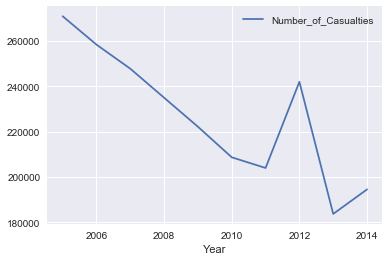

In [175]:
allaccidents.groupby(['Year']).sum()['Number_of_Casualties'].to_frame().plot(kind='line')

In [13]:
#Casualties by year
year_wise_casualties = allaccidents.groupby(['Year'])['Number_of_Casualties'].sum()
year_wise_casualties = year_wise_casualties.reset_index()
year_wise_casualties

Year  Number_of_Casualties
0  2005                271017
1  2006                258404
2  2007                247780
3  2009                222146
4  2010                208648
5  2011                203950
6  2012                241954
7  2013                183670
8  2014                194477

## WHY was there a spike in 2012?

In [319]:
accidents_2012 = allaccidents[allaccidents['Year']==2012]

In [320]:
len(accidents_2012)

156627

In [313]:
accidents_2012[accidents_2012.duplicated() == True]

Accident_Index  Longitude   Latitude  Police_Force  Accident_Severity  \
11061       2.01e+12  -2.775021  54.649766             3                  3   
11062       2.01e+12  -2.897319  54.910354             3                  3   
11063       2.01e+12  -2.650582  54.300442             3                  2   
11064       2.01e+12  -2.711737  54.309084             3                  3   
11065       2.01e+12  -2.856827  54.641216             3                  3   
11066       2.01e+12  -2.593668  54.467183             3                  3   
11067       2.01e+12  -2.936931  54.896575             3                  3   
11068       2.01e+12  -3.479472  54.723021             3                  3   
11069       2.01e+12  -3.021133  54.853388             3                  3   
11070       2.01e+12  -2.652425  54.513883             3                  3   
11071       2.01e+12  -2.880559  54.878574             3                  3   
11072       2.01e+12  -3.499435  54.708575             3                  3   
11073       2.01e+12  -2.498488  54.557395             3                  2   
11074       2.01e+12  -2.764165  54.665922             3                  3   
11075       2.01e+12  -3.371497  54.854520             3                  3   
11076       2.01e+12  -2.600594  54.202197             3                  3   
11077       2.01e+12  -3.095007  54.295159             3                  2   
11078       2.01e+12  -3.191974  54.114477             3                  3   
11079       2.01e+12  -2.734853  54.321169             3                  3   
11080       2.01e+12  -3.271900  54.221518             3                  3   
11081       2.01e+12  -3.092668  54.195144             3                  2   
11082       2.01e+12  -2.960573  54.262600             3                  3   
11083       2.01e+12  -2.912447  54.370557             3                  3   
11084       2.01e+12  -2.944538  54.895168             3                  3   
11085       2.01e+12  -2.935883  54.898471             3                  3   
11086       2.01e+12  -2.944998  54.894805             3                  3   
11087       2.01e+12  -3.313414  54.716036             3                  3   
11088       2.01e+12  -2.805884  54.368350             3                  3   
11089       2.01e+12  -2.537414  54.601265             3                  3   
11090       2.01e+12  -3.503005  54.519515             3                  3   
11091       2.01e+12  -3.220402  54.280024             3                  3   
11092       2.01e+12  -3.471719  54.556031             3                  3   
11093       2.01e+12  -2.848316  54.961122             3                  3   
11094       2.01e+12  -2.923125  54.892906             3                  3   
11095       2.01e+12  -3.605219  54.505977             3                  3   
11096       2.01e+12  -3.343406  54.787338             3                  3   
11097       2.01e+12  -3.576581  54.568462             3                  3   
11098       2.01e+12  -2.971680  54.895583             3                  3   
11099       2.01e+12  -2.859224  54.593207             3                  2   
11100       2.01e+12  -3.172739  54.245893             3                  3   
11101       2.01e+12  -3.224081  54.113795             3                  3   
11102       2.01e+12  -3.188615  54.136082             3                  3   
11103       2.01e+12  -3.317894  54.715359             3                  3   
11104       2.01e+12  -3.497943  54.710211             3                  2   
11105       2.01e+12  -3.594385  54.533175             3                  3   
11106       2.01e+12  -3.365677  54.663600             3                  3   
11107       2.01e+12  -2.738861  54.330312             3                  3   
11108       2.01e+12  -2.977727  54.422894             3                  3   
11109       2.01e+12  -3.204052  54.135299             3                  3   
11110       2.01e+12  -3.205648  54.111195             3

In [302]:
accidents_2012E = accidents_2012[accidents_2012['Accident_Index'] == '2.01E+12']

In [242]:
accidents_2012 = accidents_2012[accidents_2012['Accident_Index'] != '2.01E+12']

In [243]:
len(accidents_2012)

113222

In [244]:
dropped2012 = accidents_2012.drop_duplicates(subset = 'Accident_Index')
#dropping duplicates

In [245]:
len(dropped2012)

90139

In [246]:
real2012 = pd.concat([accidents_2012E,dropped2012])

In [247]:
len(real2012)

156632

In [322]:
realdrop = accidents_2012.drop_duplicates()

In [323]:
len(realdrop)

145566

In [324]:
non2012 = allaccidents[allaccidents['Year'] != 2012]

In [325]:
realaccidents = pd.concat([realdrop,non2012])

In [326]:
len(realaccidents)

1469788

In [328]:
realaccidents.to_csv('allaccidents.csv', index=False)

In [ ]:
allaccidents = pd.read_csv('allaccidents.csv')

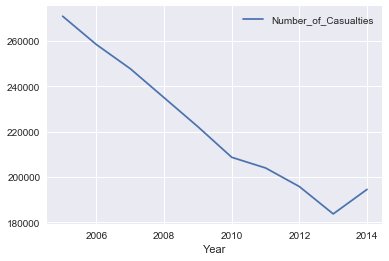

In [364]:
#reloaded
allaccidents.groupby(['Year']).sum()['Number_of_Casualties'].to_frame().plot(kind='line')

In [331]:
#lets see the numbers
year_wise_casualties = allaccidents.groupby(['Year'])['Number_of_Casualties'].sum()
year_wise_casualties = year_wise_casualties.reset_index()
year_wise_casualties

Year  Number_of_Casualties
0  2005                270889
1  2006                258362
2  2007                247739
3  2009                222125
4  2010                208639
5  2011                203937
6  2012                195718
7  2013                183660
8  2014                194477

In [332]:
day_week_cas = allaccidents.groupby(['Day_of_Week']).agg({'Number_of_Casualties':['sum']})
day_week_cas = day_week_cas.sort_values([('Number_of_Casualties','sum')],ascending=False)
day_week_cas

#Most deaths on friday

Number_of_Casualties
                             sum
Day_of_Week                     
6                         324424
5                         291865
4                         290867
3                         287681
7                         279011
2                         277593
1                         234105

In [254]:
realaccidents=realaccidents.dropna(subset=['Longitude','Latitude'])

realaccidents=realaccidents.dropna(subset=['Time'])

## accident counts by some features

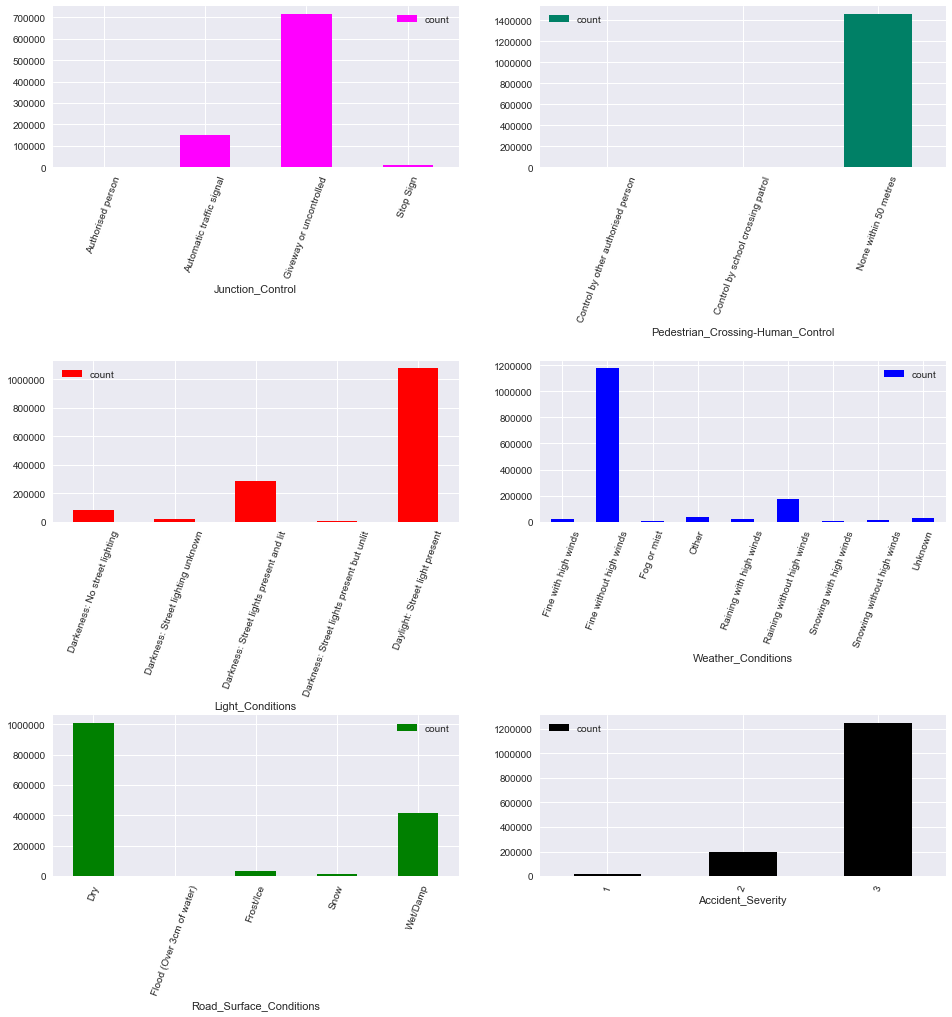

In [333]:
#COUNT
f,ax = plt.subplots(3,2,figsize=(16,16))
f = allaccidents.groupby(['Junction_Control']).sum()['count'].to_frame().plot(kind='bar', cmap = 'spring', ax=ax[0,0], rot = 70)
f = allaccidents.groupby(['Pedestrian_Crossing-Human_Control']).sum()['count'].to_frame().plot(kind='bar', cmap = 'summer', ax=ax[0,1], rot = 70)
f = allaccidents.groupby(['Light_Conditions']).sum()['count'].to_frame().plot(kind='bar', cmap = 'autumn', ax=ax[1,0], rot = 70)
f = allaccidents.groupby(['Weather_Conditions']).sum()['count'].to_frame().plot(kind='bar', cmap = 'winter', ax=ax[1,1], rot = 70)
f = allaccidents.groupby(['Road_Surface_Conditions']).sum()['count'].to_frame().plot(kind='bar', cmap = 'ocean', ax=ax[2,0], rot = 70)
f = allaccidents.groupby(['Accident_Severity']).sum()['count'].to_frame().plot(kind='bar', cmap = 'copper', ax=ax[2,1], rot = 70)
plt.subplots_adjust( hspace = 1.2 )

## casualty counts by some features

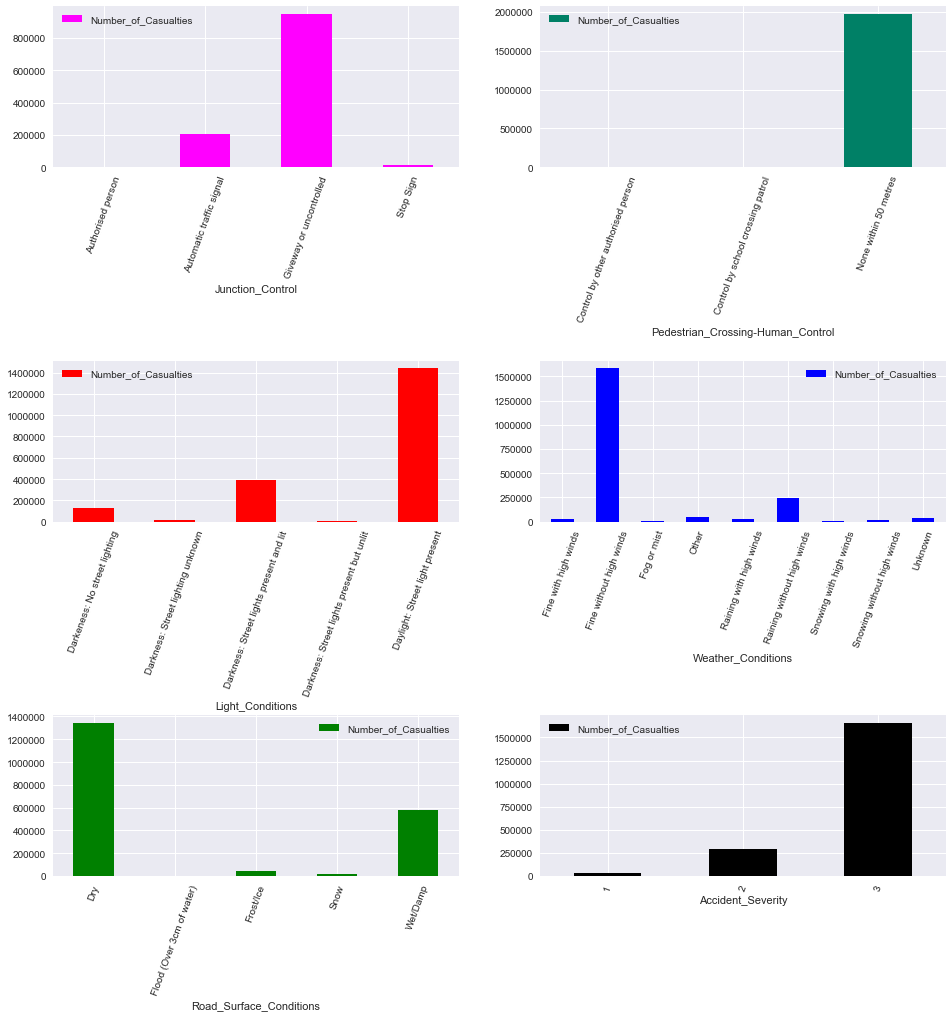

In [334]:
#CASUALTIES
f,ax = plt.subplots(3,2,figsize=(16,16))
f = allaccidents.groupby(['Junction_Control']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'spring', ax=ax[0,0], rot = 70)
f = allaccidents.groupby(['Pedestrian_Crossing-Human_Control']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'summer', ax=ax[0,1], rot = 70)
f = allaccidents.groupby(['Light_Conditions']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'autumn', ax=ax[1,0], rot = 70)
f = allaccidents.groupby(['Weather_Conditions']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'winter', ax=ax[1,1], rot = 70)
f = allaccidents.groupby(['Road_Surface_Conditions']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'ocean', ax=ax[2,0], rot = 70)
f = allaccidents.groupby(['Accident_Severity']).sum()['Number_of_Casualties'].to_frame().plot(kind='bar', cmap = 'copper', ax=ax[2,1], rot = 70)
plt.subplots_adjust( hspace = 1.2 )

## accident counts by time

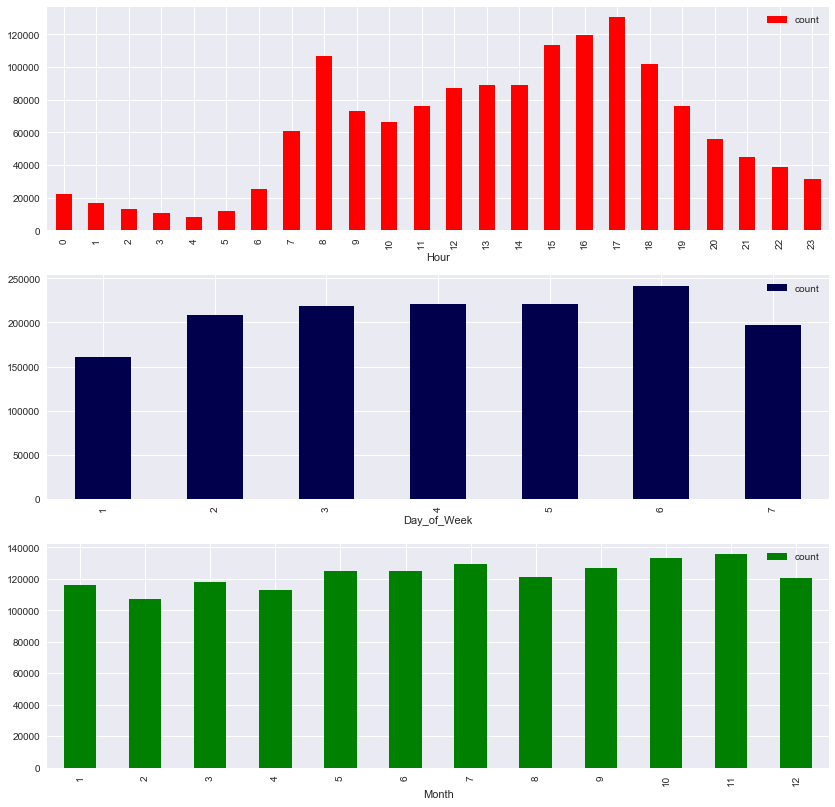

In [335]:
#COUNT
f,ax = plt.subplots(3,1,figsize=(14,14))

f = allaccidents.groupby(['Hour']).sum()['count'].to_frame().plot(ax=ax[0],cmap='autumn', kind='bar')
f = allaccidents.groupby(['Day_of_Week']).sum()['count'].to_frame().plot(ax=ax[1],cmap='seismic',kind='bar')
f = allaccidents.groupby(['Month',]).sum()['count'].to_frame().plot(ax=ax[2],cmap='ocean',kind='bar')

## casualty counts by time

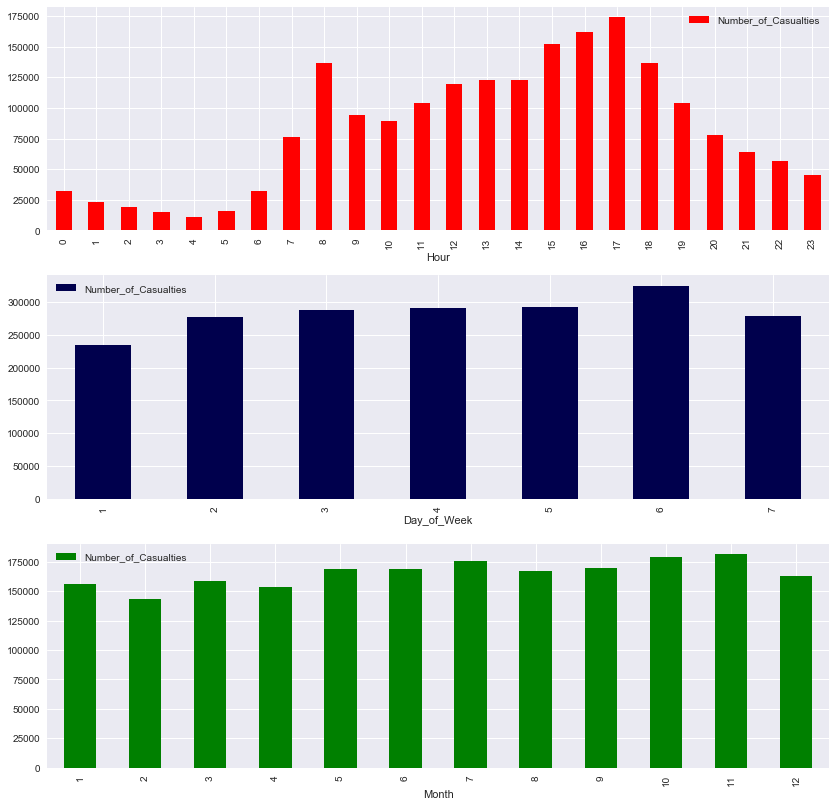

In [336]:
#CASUALTIES
f,ax = plt.subplots(3,1,figsize=(14,14))

f = allaccidents.groupby(['Hour']).sum()['Number_of_Casualties'].to_frame().plot(ax=ax[0],cmap='autumn', kind='bar')
f = allaccidents.groupby(['Day_of_Week']).sum()['Number_of_Casualties'].to_frame().plot(ax=ax[1],cmap='seismic',kind='bar')
f = allaccidents.groupby(['Month',]).sum()['Number_of_Casualties'].to_frame().plot(ax=ax[2],cmap='ocean',kind='bar')

In [337]:
area_wise = allaccidents.groupby(['Local_Authority_(District)'])['Number_of_Casualties'].size()
area_wise = area_wise.sort_values(ascending=False)
area_wise = area_wise.reset_index()
area_wise = area_wise.head(10)
area_wise

Local_Authority_(District)  Number_of_Casualties
0                         300                 27675
1                         204                 19385
2                         102                 13866
3                           1                 13559
4                         926                 13355
5                         200                 13177
6                          91                 12744
7                         215                 12513
8                         923                 11311
9                         601                 10753

## turning everything into numbers

In [338]:
road_dict = {'Roundabout':1, 'One way street':2, 'Dual carriageway':3, 'Single carriageway':6,
            'Slip road':7, 'Unknown':9, 'One way street/Slip road':12, 'Data missing or out of range':-1}

In [339]:
allaccidents['Road_Type'].replace(road_dict, inplace = True)

In [340]:
allaccidents.drop(['Junction_Detail','Junction_Control'], axis = 1, inplace = True)

In [341]:
#allaccidents.drop(['Special_Conditions_at_Site','Carriageway_Hazards'], axis = 1, inplace = True) 

In [272]:
allaccidents.isnull().sum()

Accident_Index                                      0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                                0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
2nd_Road_Class                                      0
2nd_Road_Number                                     0
Pedestrian_Crossing-Human_Co

In [342]:
ped_cross_dict = {'None within 50 metres':0, 'Control by school crossing patrol':1,
                  'Control by other authorised person':2}

In [343]:
allaccidents['Pedestrian_Crossing-Human_Control'].replace(ped_cross_dict, inplace = True)

In [344]:
ped_fac_dict = {'No physical crossing within 50 meters':0, 'Zebra crossing':1, 
                'non-junction pedestrian crossing':4,
               'Pedestrian phase at traffic signal junction':5, 'Footbridge or subway':7,
               'Central refuge':8, 'Data missing or out of range':-1}

In [345]:
allaccidents['Pedestrian_Crossing-Physical_Facilities'].replace(ped_fac_dict, inplace = True)

In [346]:
light_dict = {'Daylight: Street light present':1, 'Darkness: Street lights present and lit':4,
              'Darkness: Street lights present but unlit':5, 'Darkeness: No street lighting':6, 
              'Darkness: Street lighting unknown':7}

In [348]:
allaccidents['Light_Conditions'].replace(light_dict, inplace = True)

In [349]:
weather_dict = {'Fine without high winds':1, 'Raining without high winds':2, 'Other':8, 'Unknown':9,
               'Raining with high winds':5, 'Fine with high winds':4, 'Snowing without high winds':3,
               'Fog or mist':7, 'Snowing with high winds':6, 'Data missing or out of range':-1}

In [350]:
allaccidents['Weather_Conditions'].replace(weather_dict, inplace = True)

In [351]:
road_condition_dict = {'Dry':1, 'Wet/Damp':2, 'Snow':3, 'Frost/Ice':4, 'Flood (Over 3cm of water)':5}

In [352]:
allaccidents['Road_Surface_Conditions'].replace(road_condition_dict, inplace = True)

In [353]:
special_condition_dict = {'None':0, 'Auto traffic singal out':1, 'Roadworks':4, 'Ol or diesel':6,
                         'Mud':7, 'Road surface defective': 5, 'Permanent sign or marking defective or obscured': 3,
                         'Auto traffic signal partly defective':2}

In [354]:
allaccidents['Special_Conditions_at_Site'].replace(special_condition_dict, inplace = True)

In [355]:
carr_hazard_dict = {'None':0, 'Other object in carriageway':2, 'Any animal (except a ridden horse)':7,
                   'Pedestrian in carriageway (not injured)':6, 'Involvement with previous accident':3,
                   'Dislodged vehicle load in carriageway':1}

In [356]:
allaccidents['Carriageway_Hazards'].replace(carr_hazard_dict, inplace = True)

In [357]:
police_dict = {'Yes':1, 'No':0}

In [358]:
allaccidents['Did_Police_Officer_Attend_Scene_of_Accident'].replace(police_dict, inplace = True)

In [359]:
allaccidents.fillna(-1, inplace = True)

In [360]:
allaccidents.head()

Accident_Index  Longitude   Latitude  Police_Force  Accident_Severity  \
0       2.01e+12  -2.775021  54.649766             3                  3   
1       2.01e+12  -2.897319  54.910354             3                  3   
2       2.01e+12  -2.650582  54.300442             3                  2   
3       2.01e+12  -2.711737  54.309084             3                  3   
4       2.01e+12  -2.856827  54.641216             3                  3   

   Number_of_Vehicles  Number_of_Casualties        Date  Day_of_Week   Time  \
0                   1                     2  02/01/2012            2  15:33   
1                   1                     1  03/01/2012            3  07:00   
2                   1                     3  02/01/2012            2  10:26   
3                   1                     1  04/01/2012            4  10:10   
4                   3                     1  06/01/2012            6  18:30   

   Local_Authority_(District) Local_Authority_(Highway)  1st_Road_Class  \
0                          64                 E10000006               3   
1                          62                 E10000006               1   
2                          65                 E10000006               1   
3                          65                 E10000006               6   
4                          64                 E10000006               3   

   1st_Road_Number  Road_Type  Speed_limit  2nd_Road_Class  2nd_Road_Number  \
0               66          3           70              -1                0   
1                6          3           70              -1                0   
2                6          3           70              -1                0   
3                0          6           60              -1                0   
4               66          3           70              -1                0   

   Pedestrian_Crossing-Human_Control  Pedestrian_Crossing-Physical_Facilities  \
0                                0.0                                      0.0   
1                                0.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0                 6                 1.0                      2.0   
1                 6                 4.0                      1.0   
2                 1                 6.0                      3.0   
3                 1                 2.0                      2.0   
4                 6                 5.0                      2.0   

   Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
0                         0.0                  0.0                    2   
1                         0.0                  0.0                    2   
2                         0.0                  2.0                    2   
3                         0.0                  0.0                    2   
4                         0.0                  3.0                    2   

   Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  \
0                                          1.0                 E01019311   
1                                          1.0                 E01019240   
2                                          1.0                 E01019394   
3                                          1.0                 E01019394   
4                                          1.0                 E01019339   

   Year  Month  Hour  count  
0  2012      1    15      1  
1  2012      1     7      1  
2  2012      1    10      1  
3  2012      1    10      1  
4  2012      1    18      1

In [361]:
len(allaccidents)

1469788

In [362]:
allaccidents.to_csv('numeric_accidents.csv', index=False)

In [ ]:
numeric = pd.read_csv('numeric_accidents.csv')

In [168]:
numeric =  numeric.drop(['Accident_Index','Local_Authority_(Highway)','LSOA_of_Accident_Location','Date','Time'], axis = 1)

In [169]:
numeric.head()

Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.191170  51.489096             1                  2                   1   
1  -0.211708  51.520075             1                  3                   1   
2  -0.206458  51.525301             1                  3                   2   
3  -0.173862  51.482442             1                  3                   1   
4  -0.156618  51.495752             1                  3                   1   

   Number_of_Casualties  Day_of_Week  Local_Authority_(District)  \
0                     1            3                          12   
1                     1            4                          12   
2                     1            5                          12   
3                     1            6                          12   
4                     1            2                          12   

   1st_Road_Class  1st_Road_Number  Road_Type  Speed_limit  2nd_Road_Class  \
0               3             3218          6           30              -1   
1               4              450          3           30               5   
2               5                0          6           30              -1   
3               3             3220          6           30              -1   
4               6                0          6           30              -1   

   2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0                0                                0.0   
1                0                                0.0   
2                0                                0.0   
3                0                                0.0   
4                0                                0.0   

   Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                      1.0                 1   
1                                      5.0                 4   
2                                      0.0                 4   
3                                      0.0                 1   
4                                      0.0                 7   

   Weather_Conditions  Road_Surface_Conditions  Special_Conditions_at_Site  \
0                 2.0                      2.0                         0.0   
1                 1.0                      1.0                         0.0   
2                 1.0                      1.0                         0.0   
3                 1.0                      1.0                         0.0   
4                 1.0                      2.0                         0.0   

   Carriageway_Hazards  Urban_or_Rural_Area  \
0                  0.0                    1   
1                  0.0                    1   
2                  0.0                    1   
3                  0.0                    1   
4                  0.0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident  Year  Month  Hour  count  
0                                          1.0  2005      1  17.0      1  
1                                          1.0  2005      1  17.0      1  
2                                          1.0  2005      1   0.0      1  
3                                          1.0  2005      1  10.0      1  
4                                          1.0  2005      1  21.0      1

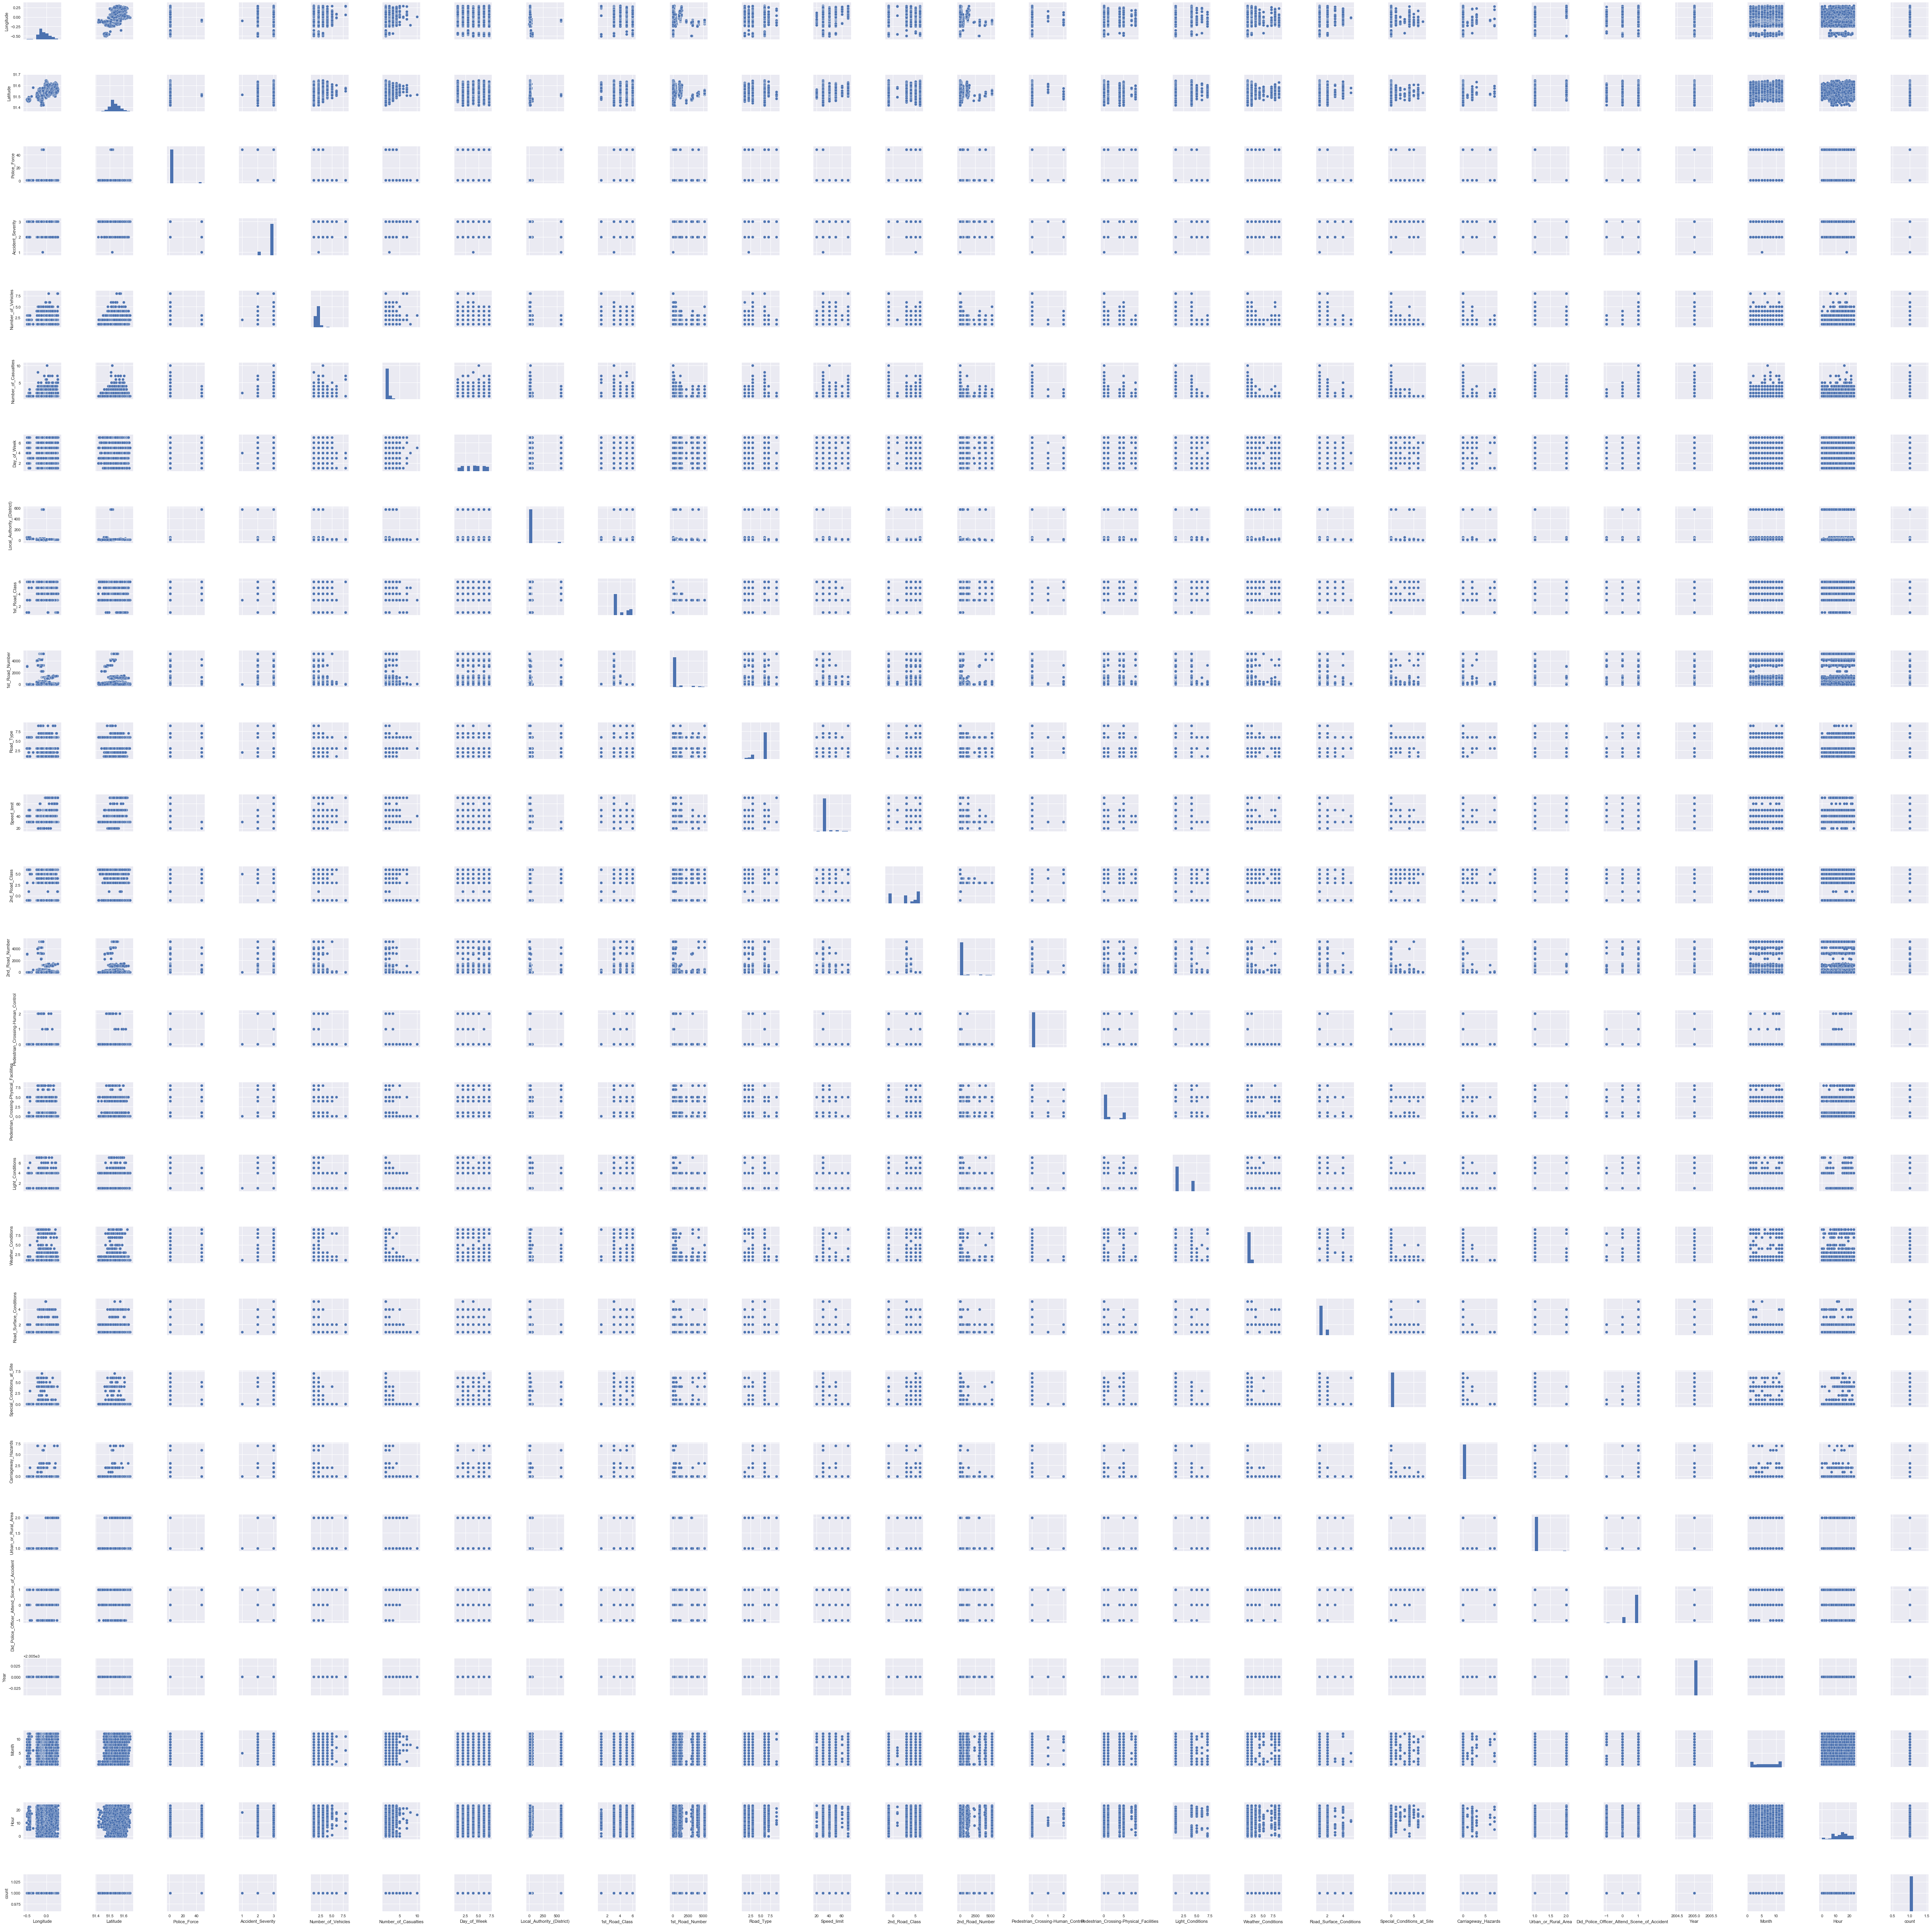

In [171]:
sns.pairplot(numeric[:10000])

In [366]:
accidents = pd.read_csv('allaccidents.csv')

/Users/djurk/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [367]:
accidents.head()

Accident_Index  Longitude   Latitude  Police_Force  Accident_Severity  \
0       2.01e+12  -2.775021  54.649766             3                  3   
1       2.01e+12  -2.897319  54.910354             3                  3   
2       2.01e+12  -2.650582  54.300442             3                  2   
3       2.01e+12  -2.711737  54.309084             3                  3   
4       2.01e+12  -2.856827  54.641216             3                  3   

   Number_of_Vehicles  Number_of_Casualties        Date  Day_of_Week   Time  \
0                   1                     2  02/01/2012            2  15:33   
1                   1                     1  03/01/2012            3  07:00   
2                   1                     3  02/01/2012            2  10:26   
3                   1                     1  04/01/2012            4  10:10   
4                   3                     1  06/01/2012            6  18:30   

   Local_Authority_(District) Local_Authority_(Highway)  1st_Road_Class  \
0                          64                 E10000006               3   
1                          62                 E10000006               1   
2                          65                 E10000006               1   
3                          65                 E10000006               6   
4                          64                 E10000006               3   

   1st_Road_Number           Road_Type  Speed_limit  Junction_Detail  \
0               66    Dual carriageway           70              NaN   
1                6    Dual carriageway           70              NaN   
2                6    Dual carriageway           70              NaN   
3                0  Single carriageway           60              NaN   
4               66    Dual carriageway           70              NaN   

  Junction_Control  2nd_Road_Class  2nd_Road_Number  \
0              NaN              -1                0   
1              NaN              -1                0   
2              NaN              -1                0   
3              NaN              -1                0   
4              NaN              -1                0   

  Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities  \
0             None within 50 metres   No physical crossing within 50 meters   
1             None within 50 metres   No physical crossing within 50 meters   
2             None within 50 metres   No physical crossing within 50 meters   
3             None within 50 metres   No physical crossing within 50 meters   
4             None within 50 metres   No physical crossing within 50 meters   

                 Light_Conditions          Weather_Conditions  \
0   Darkeness: No street lighting     Fine without high winds   
1   Darkeness: No street lighting        Fine with high winds   
2  Daylight: Street light present     Snowing with high winds   
3  Daylight: Street light present  Raining without high winds   
4   Darkeness: No street lighting     Raining with high winds   

  Road_Surface_Conditions Special_Conditions_at_Site  \
0                Wet/Damp                       None   
1                     Dry                       None   
2                    Snow                       None   
3                Wet/Damp                       None   
4                Wet/Damp                       None   

                  Carriageway_Hazards  Urban_or_Rural_Area  \
0                                None                    2   
1                                None                    2   
2         Other object in carriageway                    2   
3                                None                    2   
4  Involvement with previous accident                    2   

  Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  Year  \
0                                         Yes                 E01019311  2012   
1                                         Yes                 E01019240  2012   
2                                         

### Converting district numbers to names in for easier visibility

In [375]:
district = pd.DataFrame(accidents['Local_Authority_(District)'])

In [373]:
district

Local_Authority_(District)
0                                64
1                                62
2                                65
3                                65
4                                64
5                                64
6                                62
7                                60
8                                62
9                                64
10                               62
11                               60
12                               64
13                               64
14                               60
15                               65
16                               65
17                               61
18                               65
19                               63
20                               65
21                               65
22                               65
23                               62
24                               62
25                               62
26                               60
27                               65
28                               64
29                               63
30                               65
31                               63
32                               62
33                               62
34                               63
35                               60
36                               63
37                               62
38                               64
39                               65
40                               61
41                               61
42                               60
43                               60
44                               63
45                               60
46                               65
47                               65
48                               61
49                               61
50                               65
51                               65
52                               60
53                               62
54                               65
55                               60
56                               65
57                               65
58                               64
59                               65
60                               60
61                               63
62                               60
63                               65
64                               63
65                               63
66                               60
67                               60
68                               65
69                               61
70                               60
71                               65
72                               62
73                               64
74                               64
75                               64
76                               65
77                               61
78                               64
79                               60
80                               60
81                               64
82                               65
83                               64
84                               62
85                               62
86                               65
87                               62
88                               62
89                               65
90                               63
91                               60
92                               65
93                               62
94                               62
95                               64
96                               65
97                               65
98                               65
99                               65
100                              64
101                              65
102                              65
103                              63
104                              61
105                              65
106                              65
107                              62
108                              65
109                              60
110          

In [376]:
distdict = {1:'Westminster',
2:'Camden',
3:'Islington',
4:'Hackney',
5:'Tower_Hamlets',
6:'Greenwich',
7:'Lewisham',
8:'Southwark',
9:'Lambeth',
10:'Wandsworth',
11:'Hammersmith_and_Fulham',
12:'Kensington_and_Chelsea',
13:'Waltham_Forest',
14:'Redbridge',
15:'Havering',
16:'Barking_and_Dagenham',
17:'Newham',
18:'Bexley',
19:'Bromley',
20:'Croydon',
21:'Sutton',
22:'Merton',
23:'Kingston_upon_Thames',
24:'Richmond_upon_Thames',
25:'Hounslow',
26:'Hillingdon',
27:'Ealing',
28:'Brent',
29:'Harrow',
30:'Barnet',
31:'Haringey',
32:'Enfield',
33:'Hertsmere',
38:'Epsom_and_Ewell',
40:'Spelthorne',
57:'London_Airport_(Heathrow)',
60:'Allerdale',
61:'Barrow_in_Furness',
62:'Carlisle',
63:'Copeland',
64:'Eden',
65:'South_Lakeland',
70:'Blackburn_with_Darwen',
71:'Blackpool',
72:'Burnley',
73:'Chorley',
74:'Fylde',
75:'Hyndburn',
76:'Lancaster',
77:'Pendle',
79:'Preston',
80:'Ribble_Valley',
82:'Rossendale',
83:'South_Ribble',
84:'West_Lancashire',
85:'Wyre',
90:'Knowsley',
91:'Liverpool',
92:'St._Helens',
93:'Sefton',
95:'Wirral',
100:'Bolton',
101:'Bury',
102:'Manchester',
104:'Oldham',
106:'Rochdale',
107:'Salford',
109:'Stockport',
110:'Tameside',
112:'Trafford',
114:'Wigan',
120:'Chester',
121:'Congleton',
122:'Crewe_and_Nantwich',
123:'Ellesmere_Port_and_Neston',
124:'Halton',
126:'Macclesfield',
127:'Vale_Royal',
128:'Warrington',
129:'Cheshire_East',
130:'Cheshire_West_and_Chester',
139:'Northumberland',
140:'Alnwick',
141:'Berwick_upon_Tweed',
142:'Blyth_Valley',
143:'Castle_Morpeth',
144:'Tynedale',
145:'Wansbeck',
146:'Gateshead',
147:'Newcastle_upon_Tyne',
148:'North_Tyneside',
149:'South_Tyneside',
150:'Sunderland',
160:'Chester_le_Street',
161:'Darlington',
162:'Derwentside',
163:'Durham',
164:'Easington',
165:'Sedgefield',
166:'Teesdale',
168:'Wear_Valley',
169:'County_Durham',
180:'Craven',
181:'Hambleton',
182:'Harrogate',
184:'Richmondshire',
185:'Ryedale',
186:'Scarborough',
187:'Selby',
189:'York',
200:'Bradford',
202:'Calderdale',
203:'Kirklees',
204:'Leeds',
206:'Wakefield',
210:'Barnsley',
211:'Doncaster',
213:'Rotherham',
215:'Sheffield',
228:'Kingston_upon_Hull,_City_of',
231:'East_Riding_of_Yorkshire',
232:'North_Lincolnshire',
233:'North_East_Lincolnshire',
240:'Hartlepool',
241:'Redcar_and_Cleveland',
243:'Middlesbrough',
245:'Stockton_on_Tees',
250:'Cannock_Chase',
251:'East_Staffordshire',
252:'Lichfield',
253:'Newcastle_under_Lyme',
254:'South_Staffordshire',
255:'Stafford',
256:'Staffordshire_Moorlands',
257:'Stoke_on_Trent',
258:'Tamworth',
270:'Bromsgrove',
273:'Malvern_Hills',
274:'Redditch',
276:'Worcester',
277:'Wychavon',
278:'Wyre_Forest',
279:'Bridgnorth',
280:'North_Shropshire',
281:'Oswestry',
282:'Shrewsbury_and_Atcham',
283:'South_Shropshire',
284:'Telford_and_Wrekin',
285:'Herefordshire,_County_of_',
286:'Shropshire',
290:'North_Warwickshire',
291:'Nuneaton_and_Bedworth',
292:'Rugby_',
293:'Stratford_upon_Avon',
294:'Warwick',
300:'Birmingham',
302:'Coventry',
303:'Dudley',
305:'Sandwell',
306:'Solihull',
307:'Walsall',
309:'Wolverhampton',
320:'Amber_Valley',
321:'Bolsover',
322:'Chesterfield',
323:'Derby',
324:'Erewash',
325:'High_Peak',
327:'North_East_Derbyshire',
328:'South_Derbyshire',
329:'Derbyshire_Dales',
340:'Ashfield',
341:'Bassetlaw',
342:'Broxtowe',
343:'Gedling',
344:'Mansfield',
345:'Newark_and_Sherwood',
346:'Nottingham',
347:'Rushcliffe',
350:'Boston',
351:'East_Lindsey',
352:'Lincoln',
353:'North_Kesteven',
354:'South_Holland',
355:'South_Kesteven',
356:'West_Lindsey',
360:'Blaby',
361:'Hinckley_and_Bosworth',
362:'Charnwood',
363:'Harborough',
364:'Leicester',
365:'Melton',
366:'North_West_Leicestershire',
367:'Oadby_and_Wigston',
368:'Rutland',
380:'Corby',
381:'Daventry',
382:'East_Northamptonshire',
383:'Kettering',
384:'Northampton',
385:'South_Northamptonshire',
386:'Wellingborough',
390:'Cambridge',
391:'East_Cambridgeshire',
392:'Fenland',
393:'Huntingdonshire',
394:'Peterborough',
395:'South_Cambridgeshire',
400:'Breckland',
401:'Broadland',
402:'Great_Yarmouth',
404:'Norwich',
405:'North_Norfolk',
406:'South_Norfolk',
407:'Kings_Lynn_and_West_Norfolk',
410:'Babergh',
411:'Forest_Heath',
412:'Ipswich',
413:'Mid_Suffolk',
414:'St._Edmundsbury',
415:'Suffolk_Coastal',
416:'Waveney',
420:'Bedford',
421:'Luton',
422:'Mid_Bedfordshire',
423:'South_Bedfordshire',
424:'Central_Bedfordshire',
430:'Broxbourne',
431:'Dacorum',
432:'East_Hertfordshire',
433:'North_Hertfordshire',
434:'St._Albans',
435:'Stevenage',
436:'Three_Rivers',
437:'Watford',
438:'Welwyn_Hatfield',
450:'Basildon',
451:'Braintree',
452:'Brentwood',
453:'Castle_Point',
454:'Chelmsford',
455:'Colchester',
456:'Epping_Forest',
457:'Harlow',
458:'Maldon',
459:'Rochford',
460:'Southend_on_Sea',
461:'Tendring',
462:'Thurrock',
463:'Uttlesford',
470:'Bracknell_Forest',
471:'West_Berkshire',
472:'Reading',
473:'Slough',
474:'Windsor_and_Maidenhead',
475:'Wokingham',
476:'Aylesbury_Vale',
477:'South_Bucks',
478:'Chiltern',
479:'Milton_Keynes',
480:'Wycombe',
481:'Cherwell',
482:'Oxford',
483:'Vale_of_White_Horse',
484:'South_Oxfordshire',
485:'West_Oxfordshire',
490:'Basingstoke_and_Deane',
491:'Eastleigh',
492:'Fareham',
493:'Gosport',
494:'Hart',
495:'Havant',
496:'New_Forest',
497:'East_Hampshire',
498:'Portsmouth',
499:'Rushmoor',
500:'Southampton_',
501:'Test_Valley',
502:'Winchester',
505:'Isle_of_Wight',
510:'Elmbridge',
511:'Guildford',
512:'Mole_Valley',
513:'Reigate_and_Banstead',
514:'Runnymede',
515:'Surrey_Heath',
516:'Tandridge',
517:'Waverley',
518:'Woking',
530:'Ashford',
531:'Canterbury',
532:'Dartford',
533:'Dover',
535:'Gravesham',
536:'Maidstone',
538:'Sevenoaks',
539:'Shepway',
540:'Swale',
541:'Thanet',
542:'Tonbridge_and_Malling',
543:'Tunbridge_Wells',
544:'Medway',
551:'Eastbourne',
552:'Hastings',
554:'Lewes',
555:'Rother',
556:'Wealden',
557:'Adur',
558:'Arun',
559:'Chichester',
560:'Crawley',
562:'Horsham',
563:'Mid_Sussex',
564:'Worthing',
565:'Brighton_and_Hove',
570:'City_of_London',
580:'East_Devon',
581:'Exeter',
582:'North_Devon',
583:'Plymouth',
584:'South_Hams',
585:'Teignbridge',
586:'Mid_Devon',
587:'Torbay',
588:'Torridge',
589:'West_Devon',
590:'Caradon',
591:'Carrick',
592:'Kerrier',
593:'North_Cornwall',
594:'Penwith',
595:'Restormel',
596:'Cornwall',
601:'Bristol,_City_of',
605:'North_Somerset',
606:'Mendip',
607:'Sedgemoor',
608:'Taunton_Deane',
609:'West_Somerset',
610:'South_Somerset',
611:'Bath_and_North_East_Somerset',
612:'South_Gloucestershire',
620:'Cheltenham',
621:'Cotswold',
622:'Forest_of_Dean',
623:'Gloucester',
624:'Stroud',
625:'Tewkesbury',
630:'Kennet',
631:'North_Wiltshire',
632:'Salisbury',
633:'Swindon',
634:'West_Wiltshire',
635:'Wiltshire',
640:'Bournemouth',
641:'Christchurch',
642:'North_Dorset',
643:'Poole',
644:'Purbeck',
645:'West_Dorset',
646:'Weymouth_and_Portland',
647:'East_Dorset',
720:'Isle_of_Anglesey',
721:'Conwy',
722:'Gwynedd',
723:'Denbighshire',
724:'Flintshire',
725:'Wrexham',
730:'Blaenau_Gwent',
731:'Caerphilly',
732:'Monmouthshire',
733:'Newport',
734:'Torfaen',
740:'Bridgend',
741:'Cardiff',
742:'Merthyr_Tydfil',
743:'Neath_Port_Talbot',
744:'Rhondda,_Cynon,_Taff',
745:'Swansea',
746:'The_Vale_of_Glamorgan',
750:'Ceredigion',
751:'Carmarthenshire',
752:'Pembrokeshire',
753:'Powys',
910:'Aberdeen_City',
911:'Aberdeenshire',
912:'Angus',
913:'Argyll_and_Bute',
914:'Scottish_Borders',
915:'Clackmannanshire',
916:'West_Dunbartonshire',
917:'Dumfries_and_Galloway',
918:'Dundee_City',
919:'East_Ayrshire',
920:'East_Dunbartonshire',
921:'East_Lothian',
922:'East_Renfrewshire',
923:'Edinburgh,_City_of',
924:'Falkirk',
925:'Fife',
926:'Glasgow_City',
927:'Highland',
928:'Inverclyde',
929:'Midlothian',
930:'Moray',
931:'North_Ayrshire',
932:'North_Lanarkshire',
933:'Orkney_Islands',
934:'Perth_and_Kinross',
935:'Renfrewshire',
936:'Shetland_Islands',
937:'South_Ayrshire',
938:'South_Lanarkshire',
939:'Stirling',
940:'West_Lothian',
941:'Western_Isles'}

In [383]:
district['District_Name'] = district['Local_Authority_(District)'].copy()

In [384]:
district.head()

Local_Authority_(District)  District_Name
0                          64             64
1                          62             62
2                          65             65
3                          65             65
4                          64             64

In [386]:
district['District_Name'].replace(distdict, inplace=True)

In [388]:
district.head()

Local_Authority_(District)   District_Name
0                          64            Eden
1                          62        Carlisle
2                          65  South_Lakeland
3                          65  South_Lakeland
4                          64            Eden

In [389]:
accidents['District_Name'] = district['District_Name']

In [403]:
accidents.to_csv('allaccidents.csv', index = False)